In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('amazon.csv',encoding='iso-8859-1',parse_dates=['date'])
df

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128.0,2012-01-01
6450,2013,Tocantins,Dezembro,85.0,2013-01-01
6451,2014,Tocantins,Dezembro,223.0,2014-01-01
6452,2015,Tocantins,Dezembro,373.0,2015-01-01


In [3]:
df.dtypes

year               int64
state             object
month             object
number           float64
date      datetime64[ns]
dtype: object

In [4]:
df.isnull().sum()#the dataset is clean

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [5]:
df.duplicated().sum()#there is duplication

32

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.duplicated().sum()

0

In [8]:
#Rename month Names to english

In [9]:
df['month'] = df['month'].map({'Janeiro': 'jan',
                               'Fevereiro': 'feb',
                               'Março' : 'march',
                               'Abril': 'april',
                               'Maio': 'may',
                               'Junho' : 'jun',
                               'Julho': 'july',
                               'Agosto': 'august',
                               'Setembro': ' sep',
                               'Outubro': 'oct',
                               'Novembro': 'nov',
                               'Dezembro': 'dec'
                              })

In [10]:
df

,year,state,month,number,date
0,1998,Acre,jan,0.0,1998-01-01
1,1999,Acre,jan,0.0,1999-01-01
2,2000,Acre,jan,0.0,2000-01-01
3,2001,Acre,jan,0.0,2001-01-01
4,2002,Acre,jan,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,dec,128.0,2012-01-01
6450,2013,Tocantins,dec,85.0,2013-01-01
6451,2014,Tocantins,dec,223.0,2014-01-01
6452,2015,Tocantins,dec,373.0,2015-01-01


In [11]:
#EDA

In [12]:
df

,year,state,month,number,date
0,1998,Acre,jan,0.0,1998-01-01
1,1999,Acre,jan,0.0,1999-01-01
2,2000,Acre,jan,0.0,2000-01-01
3,2001,Acre,jan,0.0,2001-01-01
4,2002,Acre,jan,0.0,2002-01-01
...,...,...,...,...,...
6449,2012,Tocantins,dec,128.0,2012-01-01
6450,2013,Tocantins,dec,85.0,2013-01-01
6451,2014,Tocantins,dec,223.0,2014-01-01
6452,2015,Tocantins,dec,373.0,2015-01-01


In [13]:
df.shape

(6422, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6422 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   year    6422 non-null   int64         
 1   state   6422 non-null   object        
 2   month   6422 non-null   object        
 3   number  6422 non-null   float64       
 4   date    6422 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 301.0+ KB


In [15]:
df.describe()

,year,number
count,6422.000000,6422.000000
mean,2007.490969,108.815178
std,5.731806,191.142482
min,1998.000000,0.000000
25%,2003.000000,3.000000
50%,2007.000000,24.497000
75%,2012.000000,114.000000
max,2017.000000,998.000000


In [16]:
df.describe(include=object)

,state,month
count,6422,6422
unique,23,12
top,Rio,august
freq,697,540


In [17]:
#total Number of Forest Fires reported

In [18]:
df['number'].sum()

698811.073

In [19]:
#In Which Month Maximum Number of Forest Fires Were Reported ?

In [20]:
month_max_num = df.groupby('month')['number'].sum().reset_index()
month_max_num.sort_values(by='number',inplace=True,ascending=False)
month_max_num

,month,number
6,july,92319.113
11,oct,88681.579
2,august,88050.435
10,nov,85508.054
0,sep,58578.305
3,dec,57535.480
7,jun,55997.675
5,jan,47681.844
9,may,34725.363
4,feb,30839.050


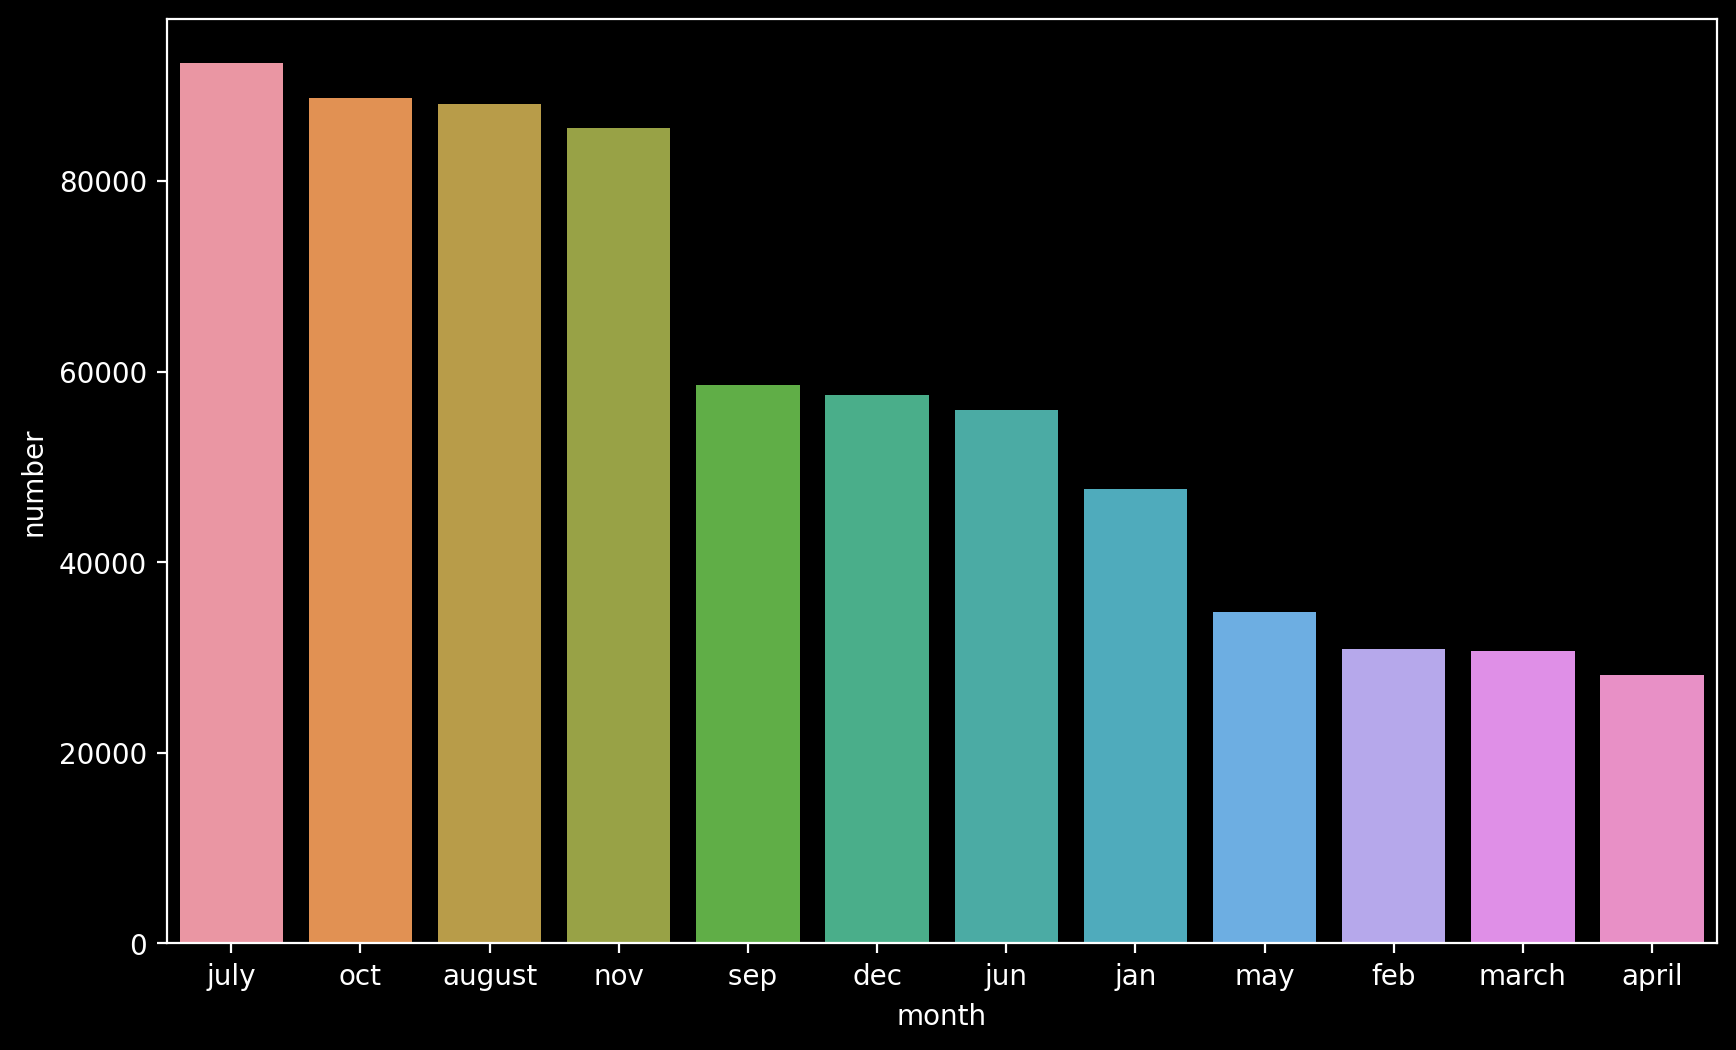

In [21]:
plt.figure(figsize=(10,6));
sns.barplot(data=month_max_num,x='month',y='number');

In [22]:
#In Which Year Maximum Number of Forest Fires Were Reported ?

In [23]:
year_max_num = df.groupby('year')['number'].sum().reset_index()
year_max_num = year_max_num.sort_values(by='number',ascending=False)
year_max_num

,year,number
5,2003,42760.674
18,2016,42212.229
17,2015,41208.292
14,2012,40084.860
16,2014,39621.183
11,2009,39116.178
6,2004,38450.163
4,2002,37390.600
12,2010,37037.449
19,2017,36619.624


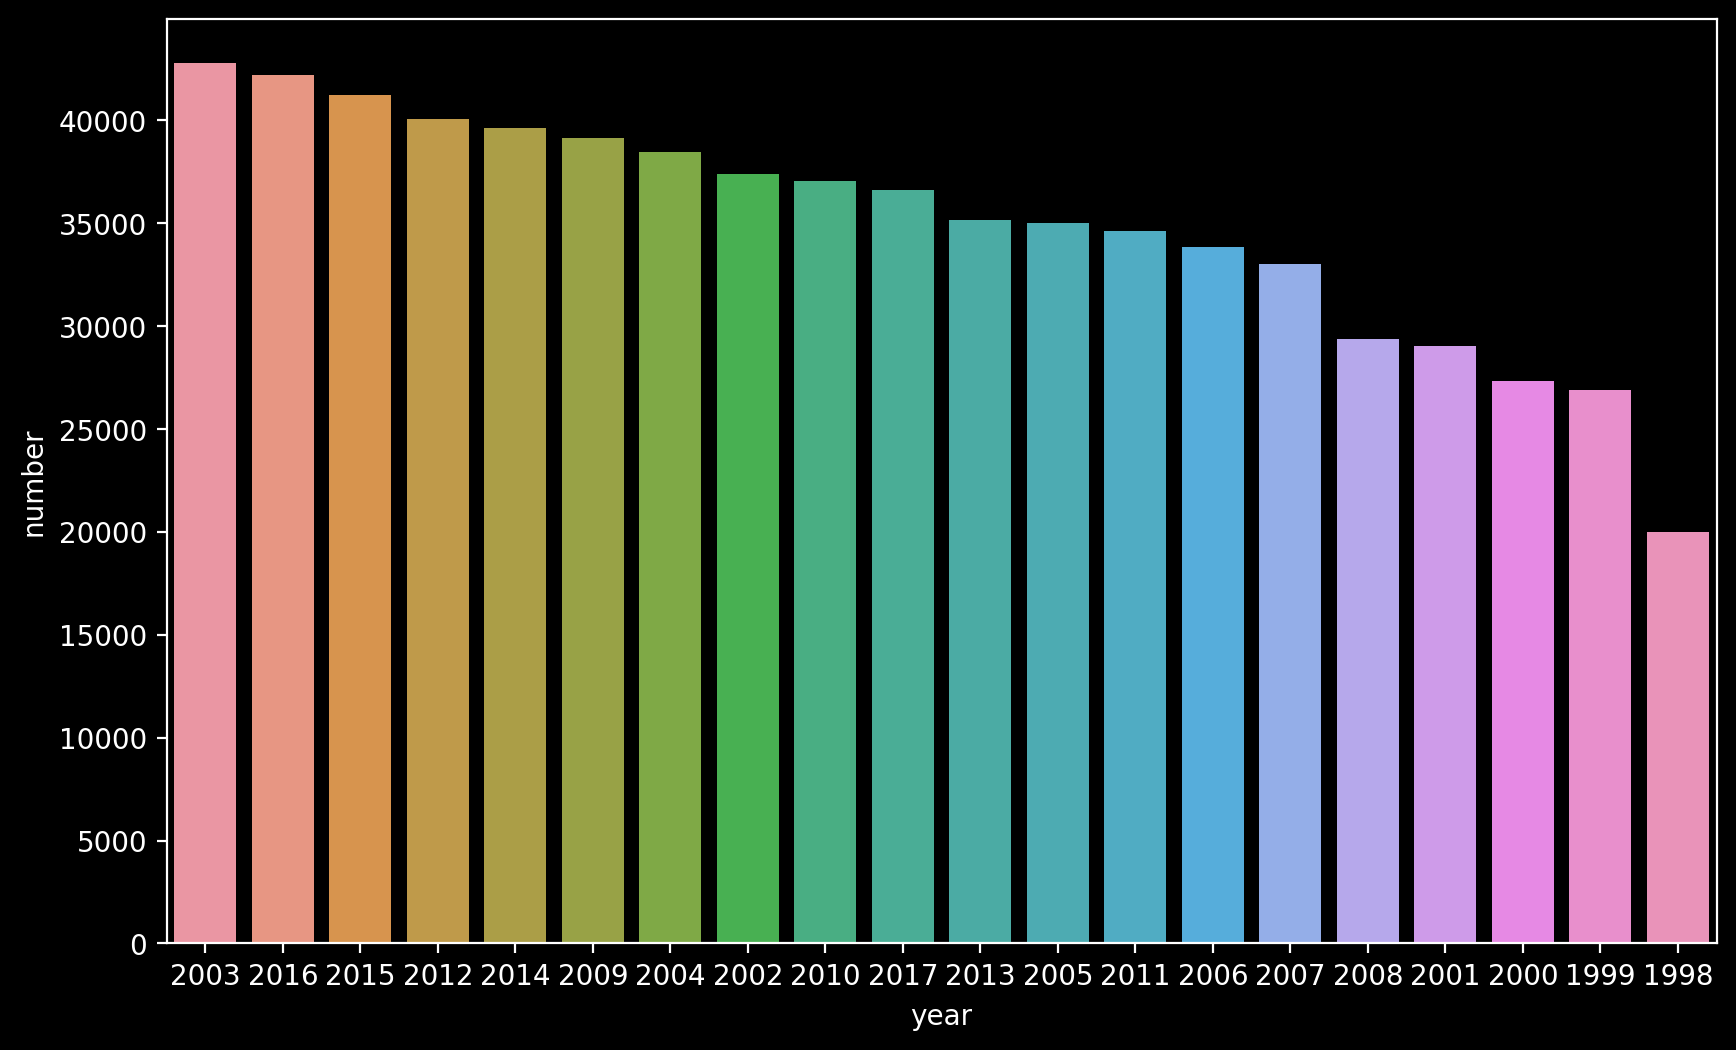

In [24]:
plt.figure(figsize=(10,6));
sns.barplot(data=year_max_num,x='year',y='number',order=year_max_num['year']);

In [25]:
#In Which State Maximum Number of Forest Fires Were Reported ?

In [26]:
state_max_num = df.groupby('state')['number'].sum().reset_index()
state_max_num = state_max_num.sort_values(by='number',ascending=False)
state_max_num

,state,number
10,Mato Grosso,96246.028
12,Paraiba,52426.918
20,Sao Paulo,51121.198
16,Rio,45094.865
4,Bahia,44746.226
15,Piau,37803.747
8,Goias,37695.520
11,Minas Gerais,37475.258
22,Tocantins,33707.885
3,Amazonas,30650.129


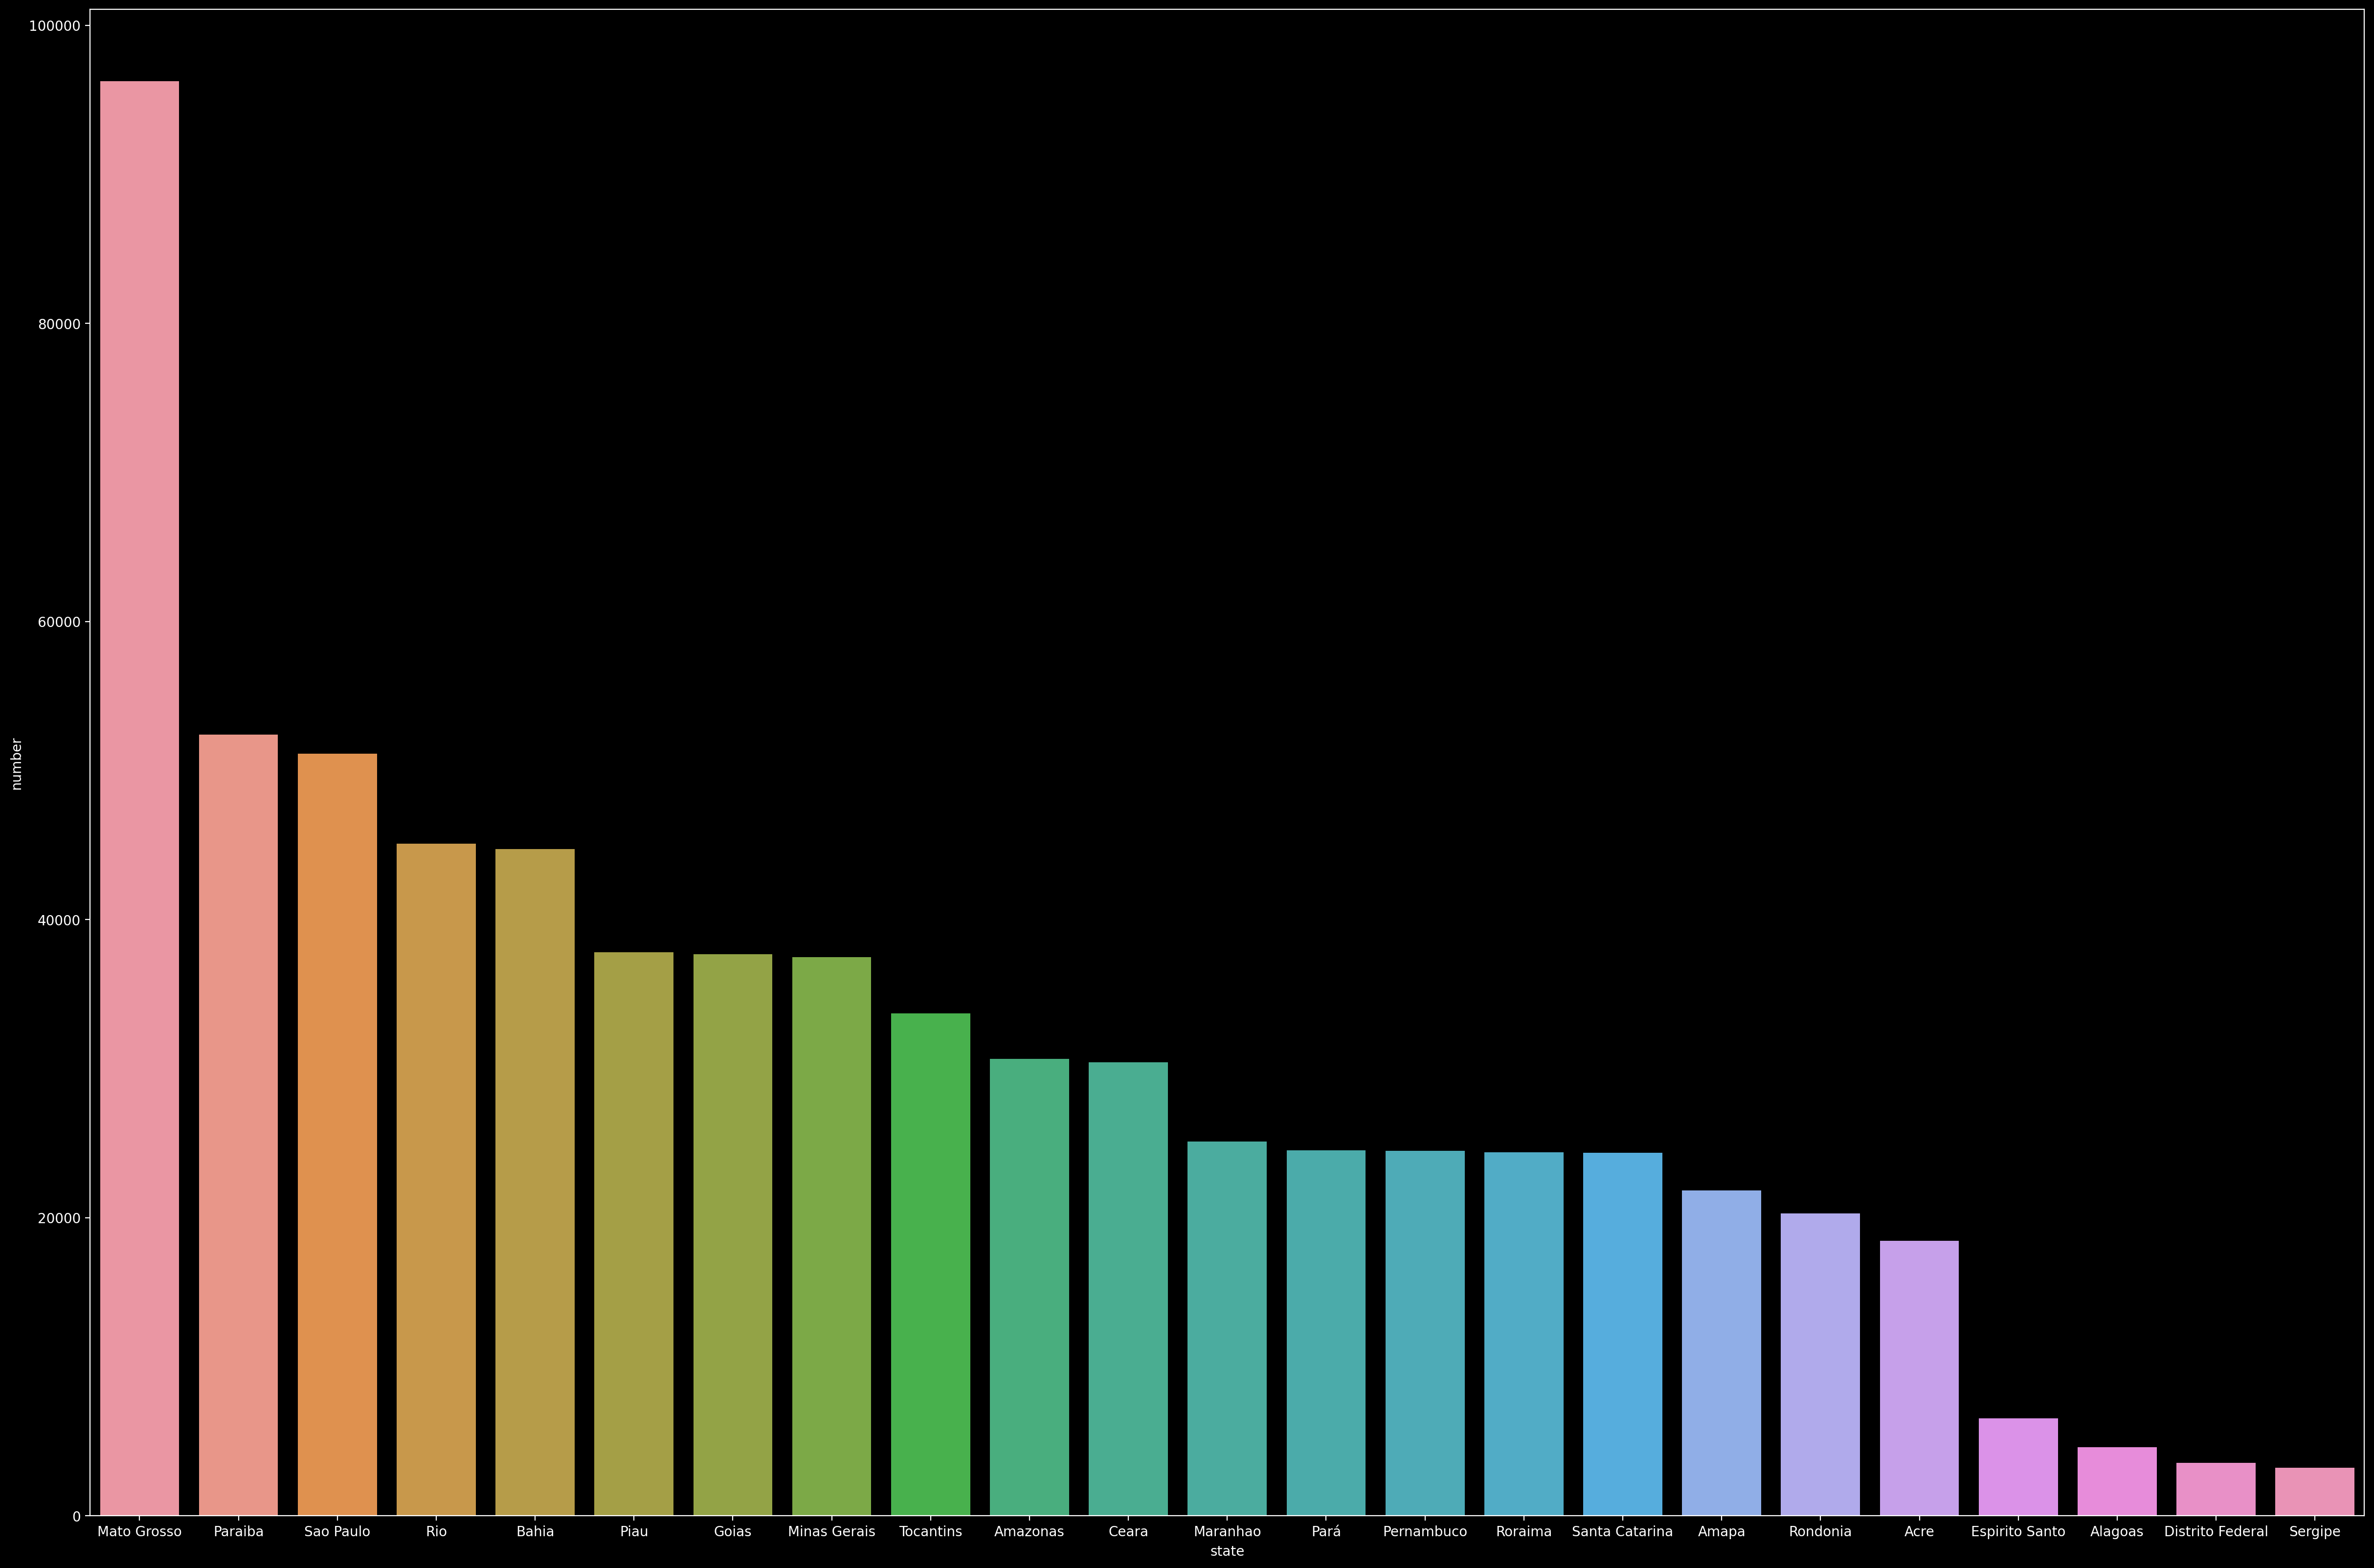

In [27]:
plt.figure(figsize=(30,20));
sns.barplot(data=state_max_num,x='state',y='number');

In [28]:
#Find total number of fires were Reported In Amazonas 

In [29]:
condition = df['state'] == 'Amazonas'
df[condition]['number'].sum()

30650.129

In [30]:
num_of_Amazonas = df[condition]
num_of_Amazonas = num_of_Amazonas.groupby('year')['number'].sum().reset_index()
num_of_Amazonas = num_of_Amazonas.sort_values(by='number',ascending=False)
num_of_Amazonas

,year,number
4,2002,2852.000
10,2008,2717.000
16,2014,2385.909
12,2010,2324.508
6,2004,2298.207
18,2016,2060.972
7,2005,1657.128
13,2011,1652.538
5,2003,1524.268
11,2009,1320.601


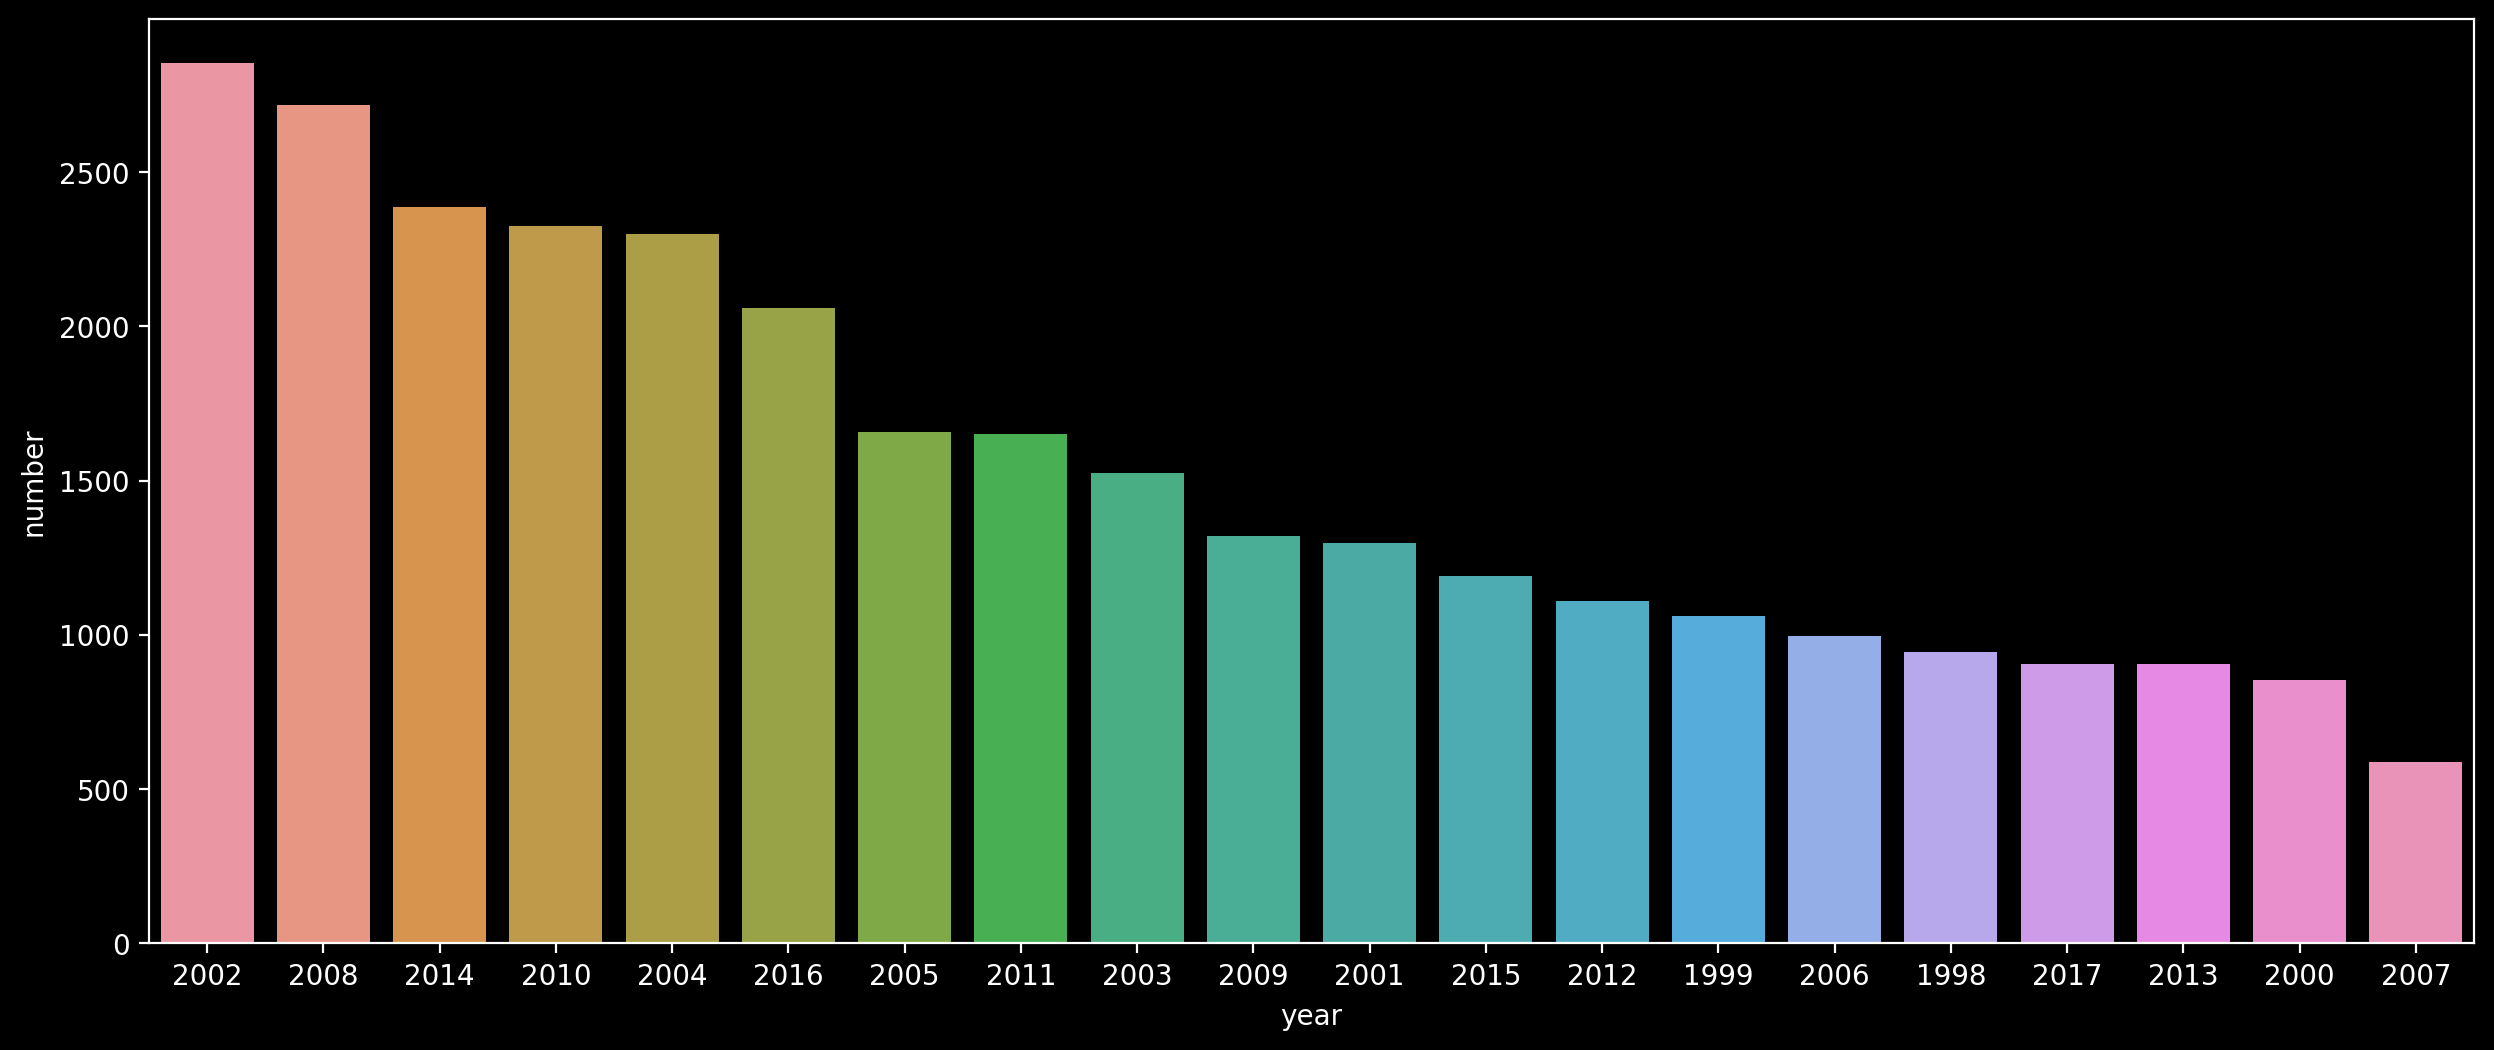

In [31]:
#Display Number of Fires Were Reported In Amazonas (Year-Wise)
plt.figure(figsize=(15,6));
sns.barplot(data=num_of_Amazonas,x='year',y='number',order=num_of_Amazonas['year']);

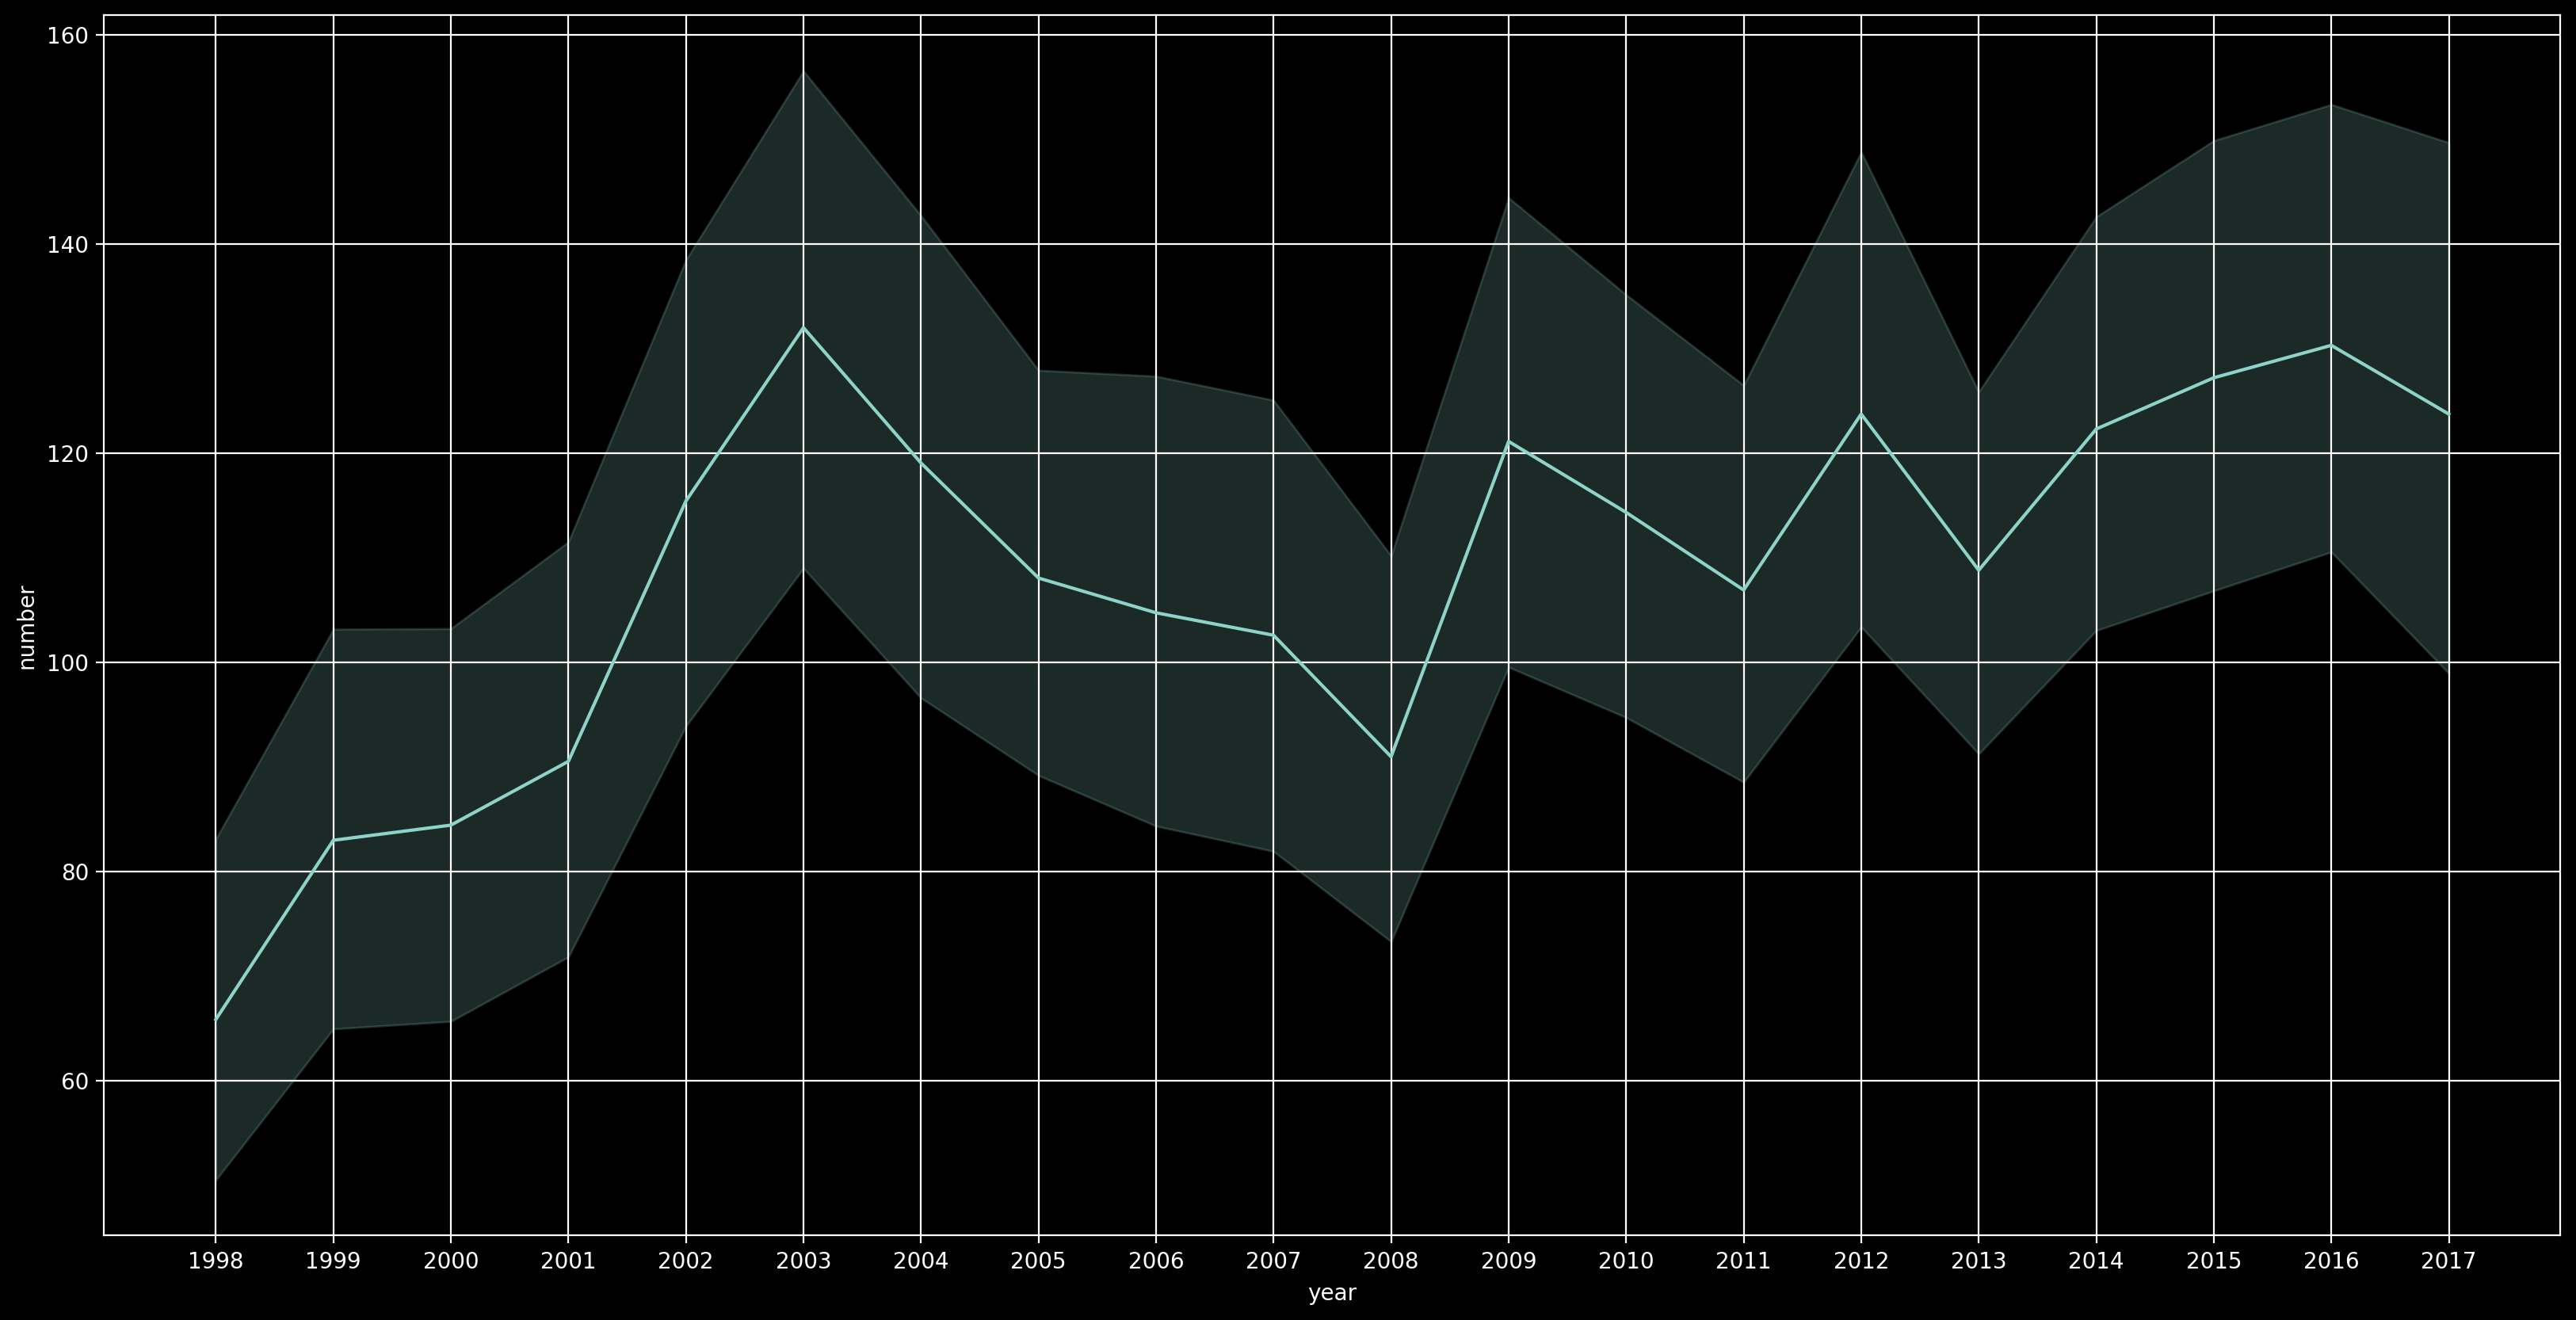

In [34]:
#the Relationship between year and number of Forest fires
plt.figure(figsize=(20,10));
sns.lineplot(data=df,x='year',y='number');
plt.xticks(df['year'].unique());
plt.grid();